In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import json

In [2]:
#data_source = '../Money-Mavericks/data/data.csv'
data_source = './data/data.csv'
df = pd.read_csv(data_source)
print(df.head())

        State  Education Budget  Unemployment Rate  Population Estimate  \
0     Alabama      5.577678e+08                4.6              4447207   
1      Alaska      1.778816e+08                6.6               626933   
2     Arizona      6.679765e+08                3.9              5130247   
3    Arkansas      3.284035e+08                4.4              2673293   
4  California      3.792097e+09                4.9             33871653   

   SNAPS household_participants  SNAPS individual_participants    SNAPS cost  \
0                   156104.5833                   3.960572e+05  3.437353e+08   
1                    13208.3333                   3.752433e+04  4.583456e+07   
2                    95567.5000                   2.590026e+05  2.402456e+08   
3                    98764.3333                   2.465715e+05  2.062364e+08   
4                   672007.0000                   1.830677e+06  1.639333e+09   

   SNAPS cost_per_person  SNAPS cost_per_household  Median Income  U

In [3]:
'''Here, we read in a given cluster. For the sake of this, the code was pre-emptively written to expect a 2D array
Each nested array will be considered a cluster, and will contain the names of all the states contained within the cluster.
Should this change, our code will be editted to reflect this.  All areas where the cluster data are used will be marked with a #TODO_CLUSTER
comment for easy lookup.'''

#Done

'Here, we read in a given cluster. For the sake of this, the code was pre-emptively written to expect a 2D array\nEach nested array will be considered a cluster, and will contain the names of all the states contained within the cluster.\nShould this change, our code will be editted to reflect this.  All areas where the cluster data are used will be marked with a #TODO_CLUSTER\ncomment for easy lookup.'

In [4]:
cluster_source = './data/clustered_states.json'
with open(cluster_source, 'r') as fp:
    data = json.load(fp)

clusters = []

for key, value in data.items():
    if(len(value) > 1):
        clusters.append(value)

print(clusters)

[['Arizona', 'Georgia', 'Illinois', 'Michigan', 'North Carolina', 'Ohio', 'Pennsylvania'], ['Arkansas', 'Idaho', 'Indiana', 'Maine', 'Montana', 'Nevada', 'Oklahoma', 'Rhode Island'], ['Delaware', 'Hawaii', 'Iowa', 'Kansas', 'Missouri', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Wyoming'], ['Alabama', 'Kentucky', 'Louisiana', 'Mississippi', 'New Mexico', 'Oregon', 'South Carolina', 'Tennessee', 'Washington', 'West Virginia'], ['California', 'Florida', 'New York', 'Texas'], ['Alaska', 'Colorado', 'Connecticut', 'Maryland', 'Massachusetts', 'Minnesota', 'New Jersey', 'Virginia', 'Wisconsin']]


In [5]:
#Now for each cluster we create a separate x and y

In [6]:
df_by_cluster = []
for cluster in clusters:
    c_df = df.loc[df['State'].isin(cluster), :].copy()
    c_df = c_df.sample(frac=1).reset_index().drop(columns='index').dropna()
    x = c_df[["State", "Education Budget", "Unemployment Rate", "Population Estimate", "Year", "GDP", "# of Jobs (In Thousands)"]] 
    x = pd.get_dummies(data=x, drop_first=True)
    y = c_df["SNAPS cost"]
    df_by_cluster.append([x,y])

In [7]:
#Now that that's created, we're going to loop over each cluster and individually create a linear regression model for them.  

In [8]:
print(df_by_cluster[1])

[     Education Budget  Unemployment Rate  Population Estimate  Year  \
0        1.344186e+08                4.1              1048259  2000   
1        5.307932e+08                5.2              1071342  2004   
2        2.983605e+08                4.6               903773  2001   
3        8.125128e+08               13.5              2712730  2011   
4        3.083178e+08                8.0              1330509  2009   
..                ...                ...                  ...   ...   
163      4.687854e+08                3.8              1391802  2005   
164      4.437756e+09                8.4              6537703  2012   
165      7.691858e+08                4.5              1055673  2017   
166      1.376380e+09                3.7              3001345  2017   
167      8.926558e+08               14.9              2684665  2010   

              GDP  # of Jobs (In Thousands)  State_Idaho  State_Indiana  \
0    4.518000e+10                     470.2            0              0

In [9]:
#setting up globals
cluster_models = []
cluster_parameters = [] #expecting [x_train, x_test, y_train, y_test]
cluster_predictions = []
cluster_ls = []

In [10]:
'''Now it's just linear regression, straight up and down.'''

"Now it's just linear regression, straight up and down."

CLUSTER 1 --------------------------------------------
Contains: 
['Arizona', 'Georgia', 'Illinois', 'Michigan', 'North Carolina', 'Ohio', 'Pennsylvania']
                            OLS Regression Results                            
Dep. Variable:             SNAPS cost   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sat, 06 May 2023   Prob (F-statistic):           6.05e-53
Time:                        22:53:59   Log-Likelihood:                -2425.7
No. Observations:                 117   AIC:                             4875.
Df Residuals:                     105   BIC:                             4908.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err         

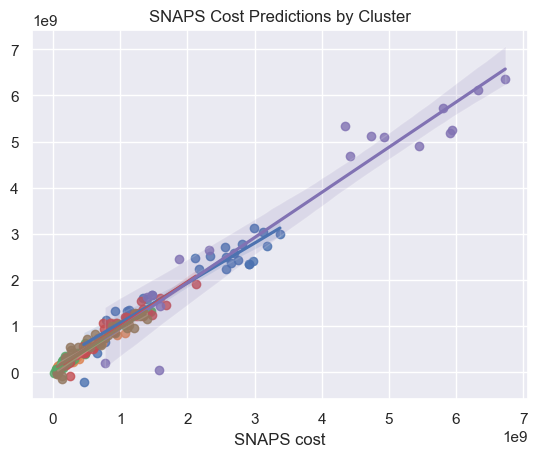

In [11]:
count = 1
sns.set()
for df_arr in df_by_cluster:
    print(f"CLUSTER {count} --------------------------------------------")
    print(f"Contains: \n{clusters[count - 1]}")
    x = df_arr[0]
    y = df_arr[1]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    predictions = model.predict(X_test)

    sns.regplot(x=y_test,y=predictions).set(title="SNAPS Cost Predictions by Cluster")
    #plt.legend(labels=["Cluster 1 Predictions", "Cluster 1 Trend", "Cluster 1 Spread", "Cluster 2 Predictions", "Cluster 2 Trend", "Cluster 2 Spread"])
    
    X_train_Sm= sm.add_constant(X_train)
    X_train_Sm= sm.add_constant(X_train)
    ls=sm.OLS(y_train,X_train_Sm).fit()
    print(ls.summary())
    
    cluster_models.append(model)
    cluster_parameters.append([X_train, X_test, y_train, y_test])
    cluster_predictions.append(predictions)
    cluster_ls.append(ls)
    count += 1
    print("\n\n\n")

[Text(0.5, 1.0, 'Cluster 1 SNAPS predictions')]

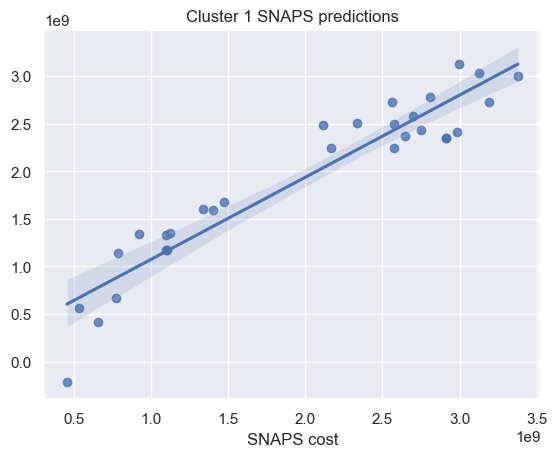

In [12]:
sns.regplot(x=cluster_parameters[0][3],y=cluster_predictions[0]).set(title="Cluster 1 SNAPS predictions")

[Text(0.5, 1.0, 'Cluster 2 SNAPS predictions')]

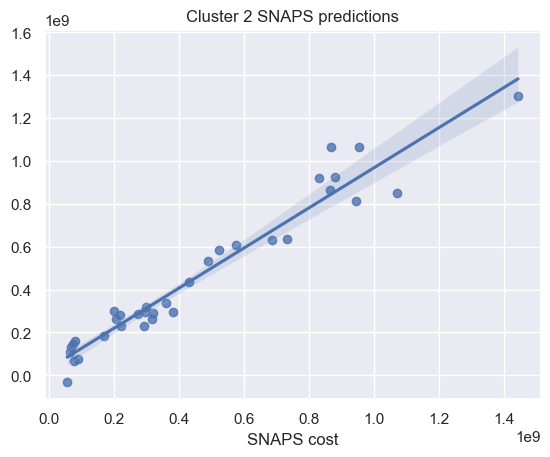

In [13]:
sns.regplot(x=cluster_parameters[1][3],y=cluster_predictions[1]).set(title="Cluster 2 SNAPS predictions")

[Text(0.5, 1.0, 'Cluster 3 SNAPS predictions')]

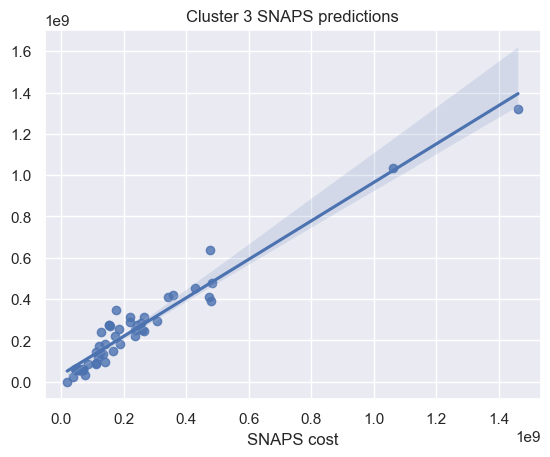

In [14]:
sns.regplot(x=cluster_parameters[2][3],y=cluster_predictions[2]).set(title="Cluster 3 SNAPS predictions")